Alunos:

bfss@cesar.school - Bruno

fom@cesar.school - Fabio

mgrb@cesar.school - Marlos

rmbp@cesar.school - Renata

# Import do dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2002/dados/mall_customers.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Tratamento de dados

In [ ]:
df.rename(columns={'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'}, inplace=True)

In [ ]:
df['Genre'] = df['Genre'].map({'Male': 1, 'Female': 0})

In [ ]:
count = (df['Age']  < 20).sum()
print(count)

12


In [ ]:
# pegando uma amostra do dataframe, das idades menores que 25 anos
df = df[df['Age'] < 20]

# Método

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 162
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      12 non-null     int64
 1   Genre           12 non-null     int64
 2   Age             12 non-null     int64
 3   annual_income   12 non-null     int64
 4   spending_score  12 non-null     int64
dtypes: int64(5)
memory usage: 576.0 bytes


In [ ]:
df.describe()

,CustomerID,Genre,Age,annual_income,spending_score
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,90.250000,0.750000,18.666667,55.083333,46.500000
std,45.678969,0.452267,0.492366,18.243097,22.697617
min,1.000000,0.000000,18.000000,15.000000,5.000000
25%,65.000000,0.750000,18.000000,47.500000,40.500000
50%,102.000000,1.000000,19.000000,61.000000,49.000000
75%,115.250000,1.000000,19.000000,65.000000,56.000000
max,163.000000,1.000000,19.000000,81.000000,92.000000


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
print(scaler.fit(df[['annual_income', 'spending_score']].values))
print(scaler.mean_)
print(scaler.transform(df[['annual_income', 'spending_score']].values))

df[['annual_income_std', 'spending_score_std']] = scaler.transform(df[['annual_income', 'spending_score']].values)
features = ['annual_income_std', 'spending_score_std']


StandardScaler()
[55.08333333 46.5       ]
[[-2.29487763 -0.34512409]
 [-1.26432967  2.09375284]
 [-0.52004503  0.39114064]
 [-0.40553971  0.57520682]
 [-0.40553971  0.57520682]
 [ 0.2242396  -0.253091  ]
 [ 0.45325026  0.34512409]
 [ 0.51050292 -0.02300827]
 [ 0.56775559  0.06902482]
 [ 0.56775559  0.16105791]
 [ 1.08302957 -1.67960393]
 [ 1.48379822 -1.90968666]]


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Escolhendo o número de clusters usando o método do cotovelo (elbow method)
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[features])
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

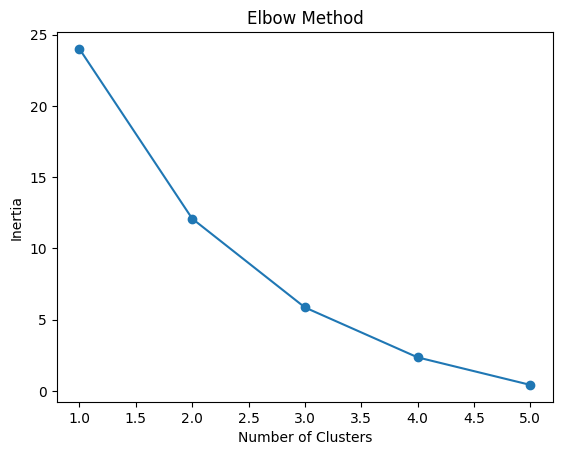

In [ ]:
plt.plot(range(1, 6), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import math

In [ ]:
df.head(15)

,CustomerID,Genre,Age,annual_income,spending_score,annual_income_std,spending_score_std
0,1,1,19,15,39,-2.294878,-0.345124
33,34,1,18,33,92,-1.264330,2.093753
61,62,1,19,46,55,-0.520045,0.391141
65,66,1,18,48,59,-0.405540,0.575207
68,69,1,19,48,59,-0.405540,0.575207
91,92,1,18,59,41,0.224240,-0.253091
111,112,0,19,63,54,0.453250,0.345124
113,114,1,19,64,46,0.510503,-0.023008
114,115,0,18,65,48,0.567756,0.069025
115,116,0,19,65,50,0.567756,0.161058


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


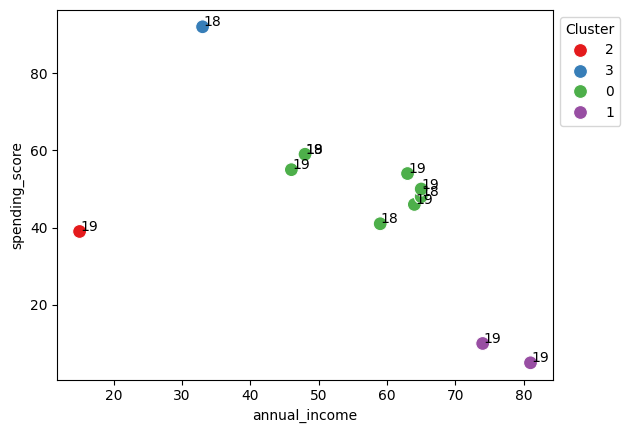

In [ ]:
# Apply K-Means with the current value of k
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[features])
df['Cluster'] = df['Cluster'].astype(str)

# Scatter plot of data points with cluster coloring
ax = sns.scatterplot(data=df, s=100, x='annual_income', y='spending_score', hue='Cluster', palette='Set1')
#ax.set_xlim(1, 12)
#ax.set_ylim(1, 10)


for i, txt in enumerate(df.Age):
  ax.annotate(txt, (df.iloc[i].annual_income+0.1, df.iloc[i].spending_score+0.1))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


In [ ]:
kmeans

KMeans(n_clusters=4, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

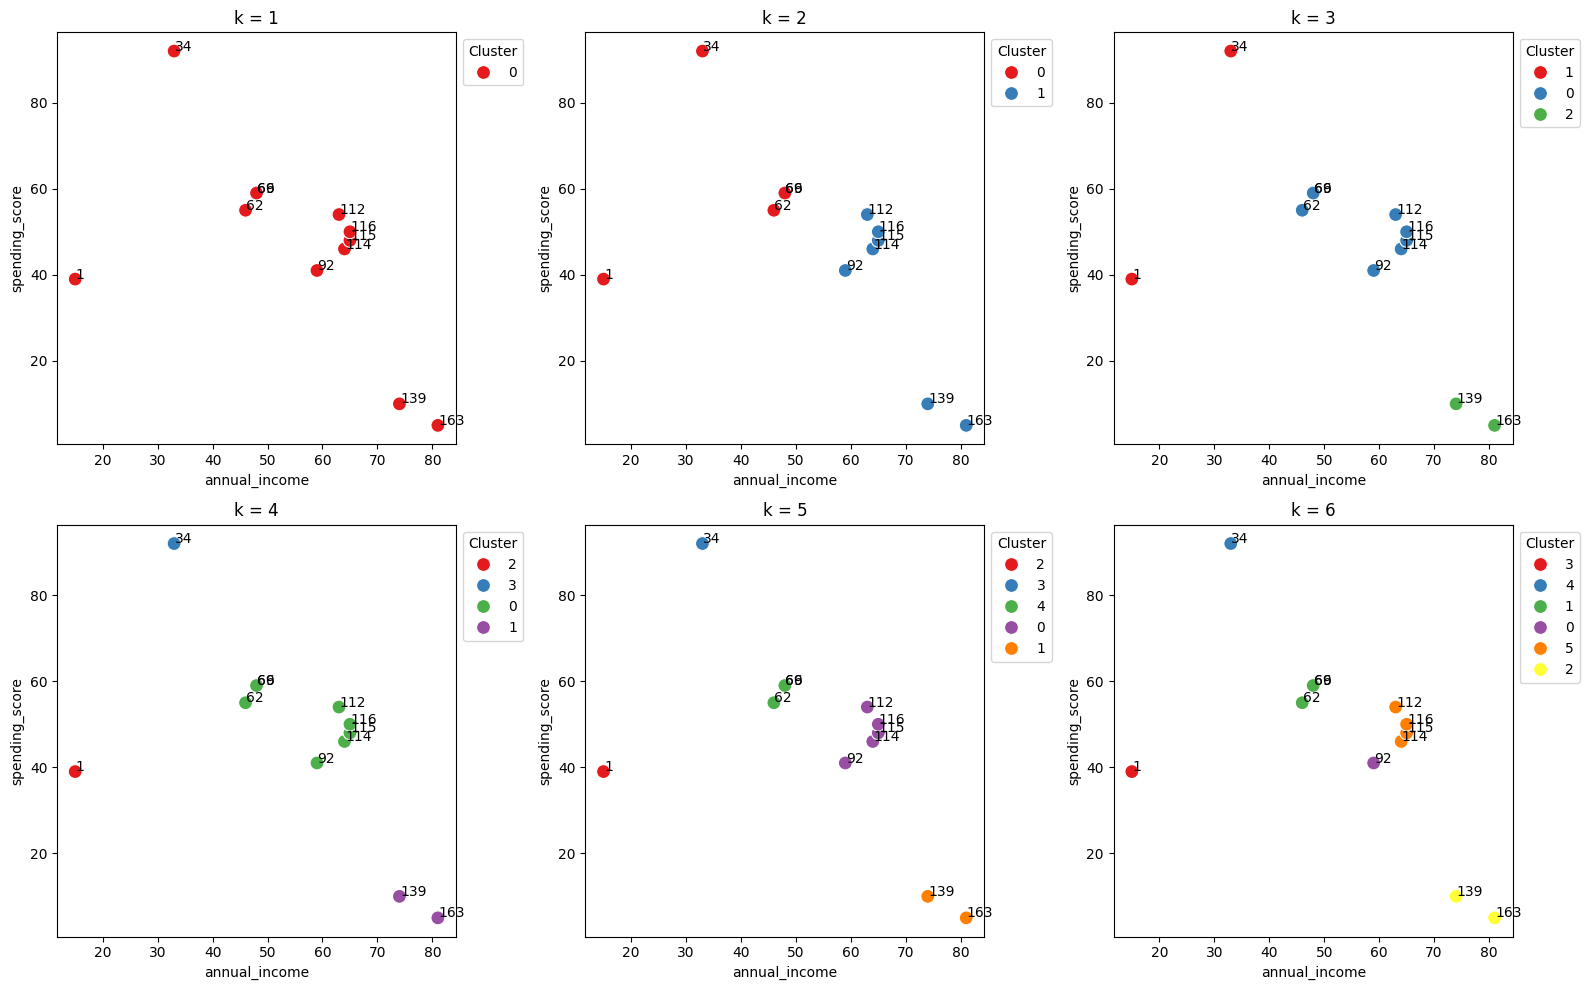

In [ ]:
# Define the number of clusters you want to visualize
num_clusters = 6

# Calculate the number of rows and columns for the grid of plots
cols = 3
rows = math.ceil(num_clusters / cols)

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))


# Loop through each value of k
for k in range(1, num_clusters + 1):
    row = (k - 1) // cols
    col = (k - 1) % cols

    # Apply K-Means with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df[features])
    df['Cluster'] = df['Cluster'].astype(str)

    # Scatter plot of data points with cluster coloring
    ax = sns.scatterplot(ax=axes[row, col], data=df, s=100, x='annual_income', y='spending_score', hue='Cluster', palette='Set1')
    #ax.set_xlim(1, 12)
    #ax.set_ylim(1, 10)


    for i, txt in enumerate(df.CustomerID):
      ax.annotate(txt, (df.iloc[i].annual_income+0.1, df.iloc[i].spending_score+0.1))

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    axes[row, col].set_title(f'k = {k}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[features])
df['Cluster'] = df['Cluster'].astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df[df['Cluster'] == '5']

,CustomerID,Genre,Age,annual_income,spending_score,annual_income_std,spending_score_std,Cluster
111,112,0,19,63,54,0.453250,0.345124,5
113,114,1,19,64,46,0.510503,-0.023008,5
114,115,0,18,65,48,0.567756,0.069025,5
115,116,0,19,65,50,0.567756,0.161058,5
